In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14

import warnings
warnings.filterwarnings("ignore")

from zwad.ad.preprocess import load_dataset
from zwad.ad.postprocess import load_ad_tables_by_patterns
from zwad.utils import latex_feature_names

In [2]:
data = 'three_fields.csv'

X = pd.read_csv('../data/{}'.format(data), compression='gzip', index_col = 0, error_bad_lines=False)
X.rename(columns=latex_feature_names('../data/latex_feature_names.csv'), inplace=True)
X

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
795216100016711,0.540999,0.384615,0.038462,0.132028,1.397621,5.995161e+08,0.384998,0.626499,-0.370707,0.000028,...,0.158873,0.046190,0.988132,1.153393,12.302343,2.094434,-0.561686,0.243355,0.819022,20.531246
795216200000160,0.555500,0.309091,0.045455,0.150656,1.558752,2.858594e+09,0.257999,0.555500,0.195134,-0.000409,...,0.177428,0.015411,0.810837,0.988667,8.658415,1.084765,-0.186345,0.204943,0.773804,20.622486
795216200000423,0.682500,0.263566,0.062016,0.135337,1.415388,1.171590e+09,0.249001,0.525002,2.017293,-0.000368,...,0.137916,0.049931,0.924430,1.028984,6.990223,1.522744,-0.782636,0.212639,0.718653,20.564688
795216200021594,0.471500,0.324561,0.035088,0.120368,1.609693,1.157334e+09,0.191000,0.423700,0.339782,0.000081,...,0.154165,0.064802,1.049195,1.079942,10.374885,1.000001,-0.109285,0.165479,0.763212,20.291206
795216100016924,0.707000,0.330275,0.027523,0.222071,1.255423,1.167658e+09,0.350498,0.581999,0.391907,-0.000741,...,0.189391,0.012856,0.738287,1.210104,9.334059,1.520369,-0.238332,0.242174,0.775877,20.811619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695211200027762,0.137500,0.300000,0.032000,0.076794,1.583493,6.722693e+09,0.053001,0.105000,0.686157,-0.000049,...,0.172669,0.028054,0.722513,0.826720,9.868394,1.089929,-0.198571,0.041880,0.782368,18.673153
695211200001880,0.049500,0.283465,0.055118,0.151784,1.451552,2.788117e+09,0.018000,0.037000,0.999901,-0.000003,...,0.165232,0.017666,0.749935,0.936335,12.354101,1.967447,0.421042,0.015429,0.763788,14.979458
695211200027621,0.073500,0.274590,0.049180,0.083840,1.638867,3.939941e+09,0.033501,0.057198,0.447904,-0.000009,...,0.165867,0.023609,0.749228,0.822715,9.576206,1.469046,-0.069856,0.024325,0.793072,17.515738
695211200002462,0.044000,0.311024,0.074803,0.152871,1.594203,2.863704e+09,0.020000,0.041000,0.126569,0.000034,...,0.174980,0.017528,0.722896,0.866926,11.782808,1.851398,0.099805,0.016328,0.791217,15.804447


In [3]:
scaler = StandardScaler()

feature_col=X.columns[0:41]
X_norm = scaler.fit_transform(X[feature_col])
pd.DataFrame(X_norm)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.420895,3.482948,-1.233326,1.150481,-2.035614,-1.840113,3.655302,2.800030,-0.229283,0.258657,...,-0.932120,-0.244056,1.248831,3.319994,0.315766,-0.058555,0.007328,-1.019619,2.650031,1.403485
1,1.496534,0.609837,-0.316115,1.592412,-1.295114,-1.825047,2.026275,2.337095,-0.157106,-1.119403,...,-1.118156,0.552922,-1.184605,0.835676,0.085324,-0.253831,-0.044135,-0.407338,2.028669,-0.035206
2,2.158999,-1.122030,1.856041,1.228984,-1.953965,-1.836298,1.910846,2.138236,0.075322,-0.990982,...,0.060068,-1.144232,1.544600,2.427378,0.141726,-0.343229,-0.021811,-1.380049,2.153164,-1.789924
3,1.058369,1.198368,-1.675840,0.873887,-1.061010,-1.836393,1.166867,1.477723,-0.138656,0.424987,...,-0.459281,-0.446273,2.720361,4.175642,0.213012,-0.161846,-0.048455,-0.281632,1.390284,-0.372195
4,2.286797,1.415734,-2.668046,3.286564,-2.689105,-1.836324,3.212766,2.509874,-0.132007,-2.164691,...,-0.312003,1.066744,-1.386611,-0.180924,0.395101,-0.217624,-0.021932,-0.492142,2.630932,0.030744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254717,-0.683868,0.264000,-2.080829,-0.159810,-1.181413,-1.799277,-0.603254,-0.600298,-0.094473,0.014649,...,-0.047484,0.348487,-0.185088,-0.401953,-0.141228,-0.188989,-0.043871,-0.427281,-0.609083,0.237275
2254718,-1.142899,-0.365043,0.951370,1.619159,-1.787768,-1.825517,-1.052225,-1.043676,-0.054453,0.160432,...,-0.475752,0.029080,-1.006325,-0.017702,0.012116,-0.055781,0.000856,0.583475,-1.036965,-0.353872
2254719,-1.017710,-0.702644,0.172564,0.007336,-0.926939,-1.817836,-0.853392,-0.911980,-0.124864,0.142416,...,0.079447,0.056323,-0.536523,-0.027618,-0.146832,-0.204647,-0.024548,-0.217313,-0.893059,0.577844
2254720,-1.171590,0.683362,3.533284,1.644947,-1.132196,-1.825013,-1.026573,-1.017591,-0.165852,0.277026,...,-0.141470,0.447775,-1.017238,-0.396595,-0.084984,-0.086396,-0.005059,0.059451,-1.022428,0.518828


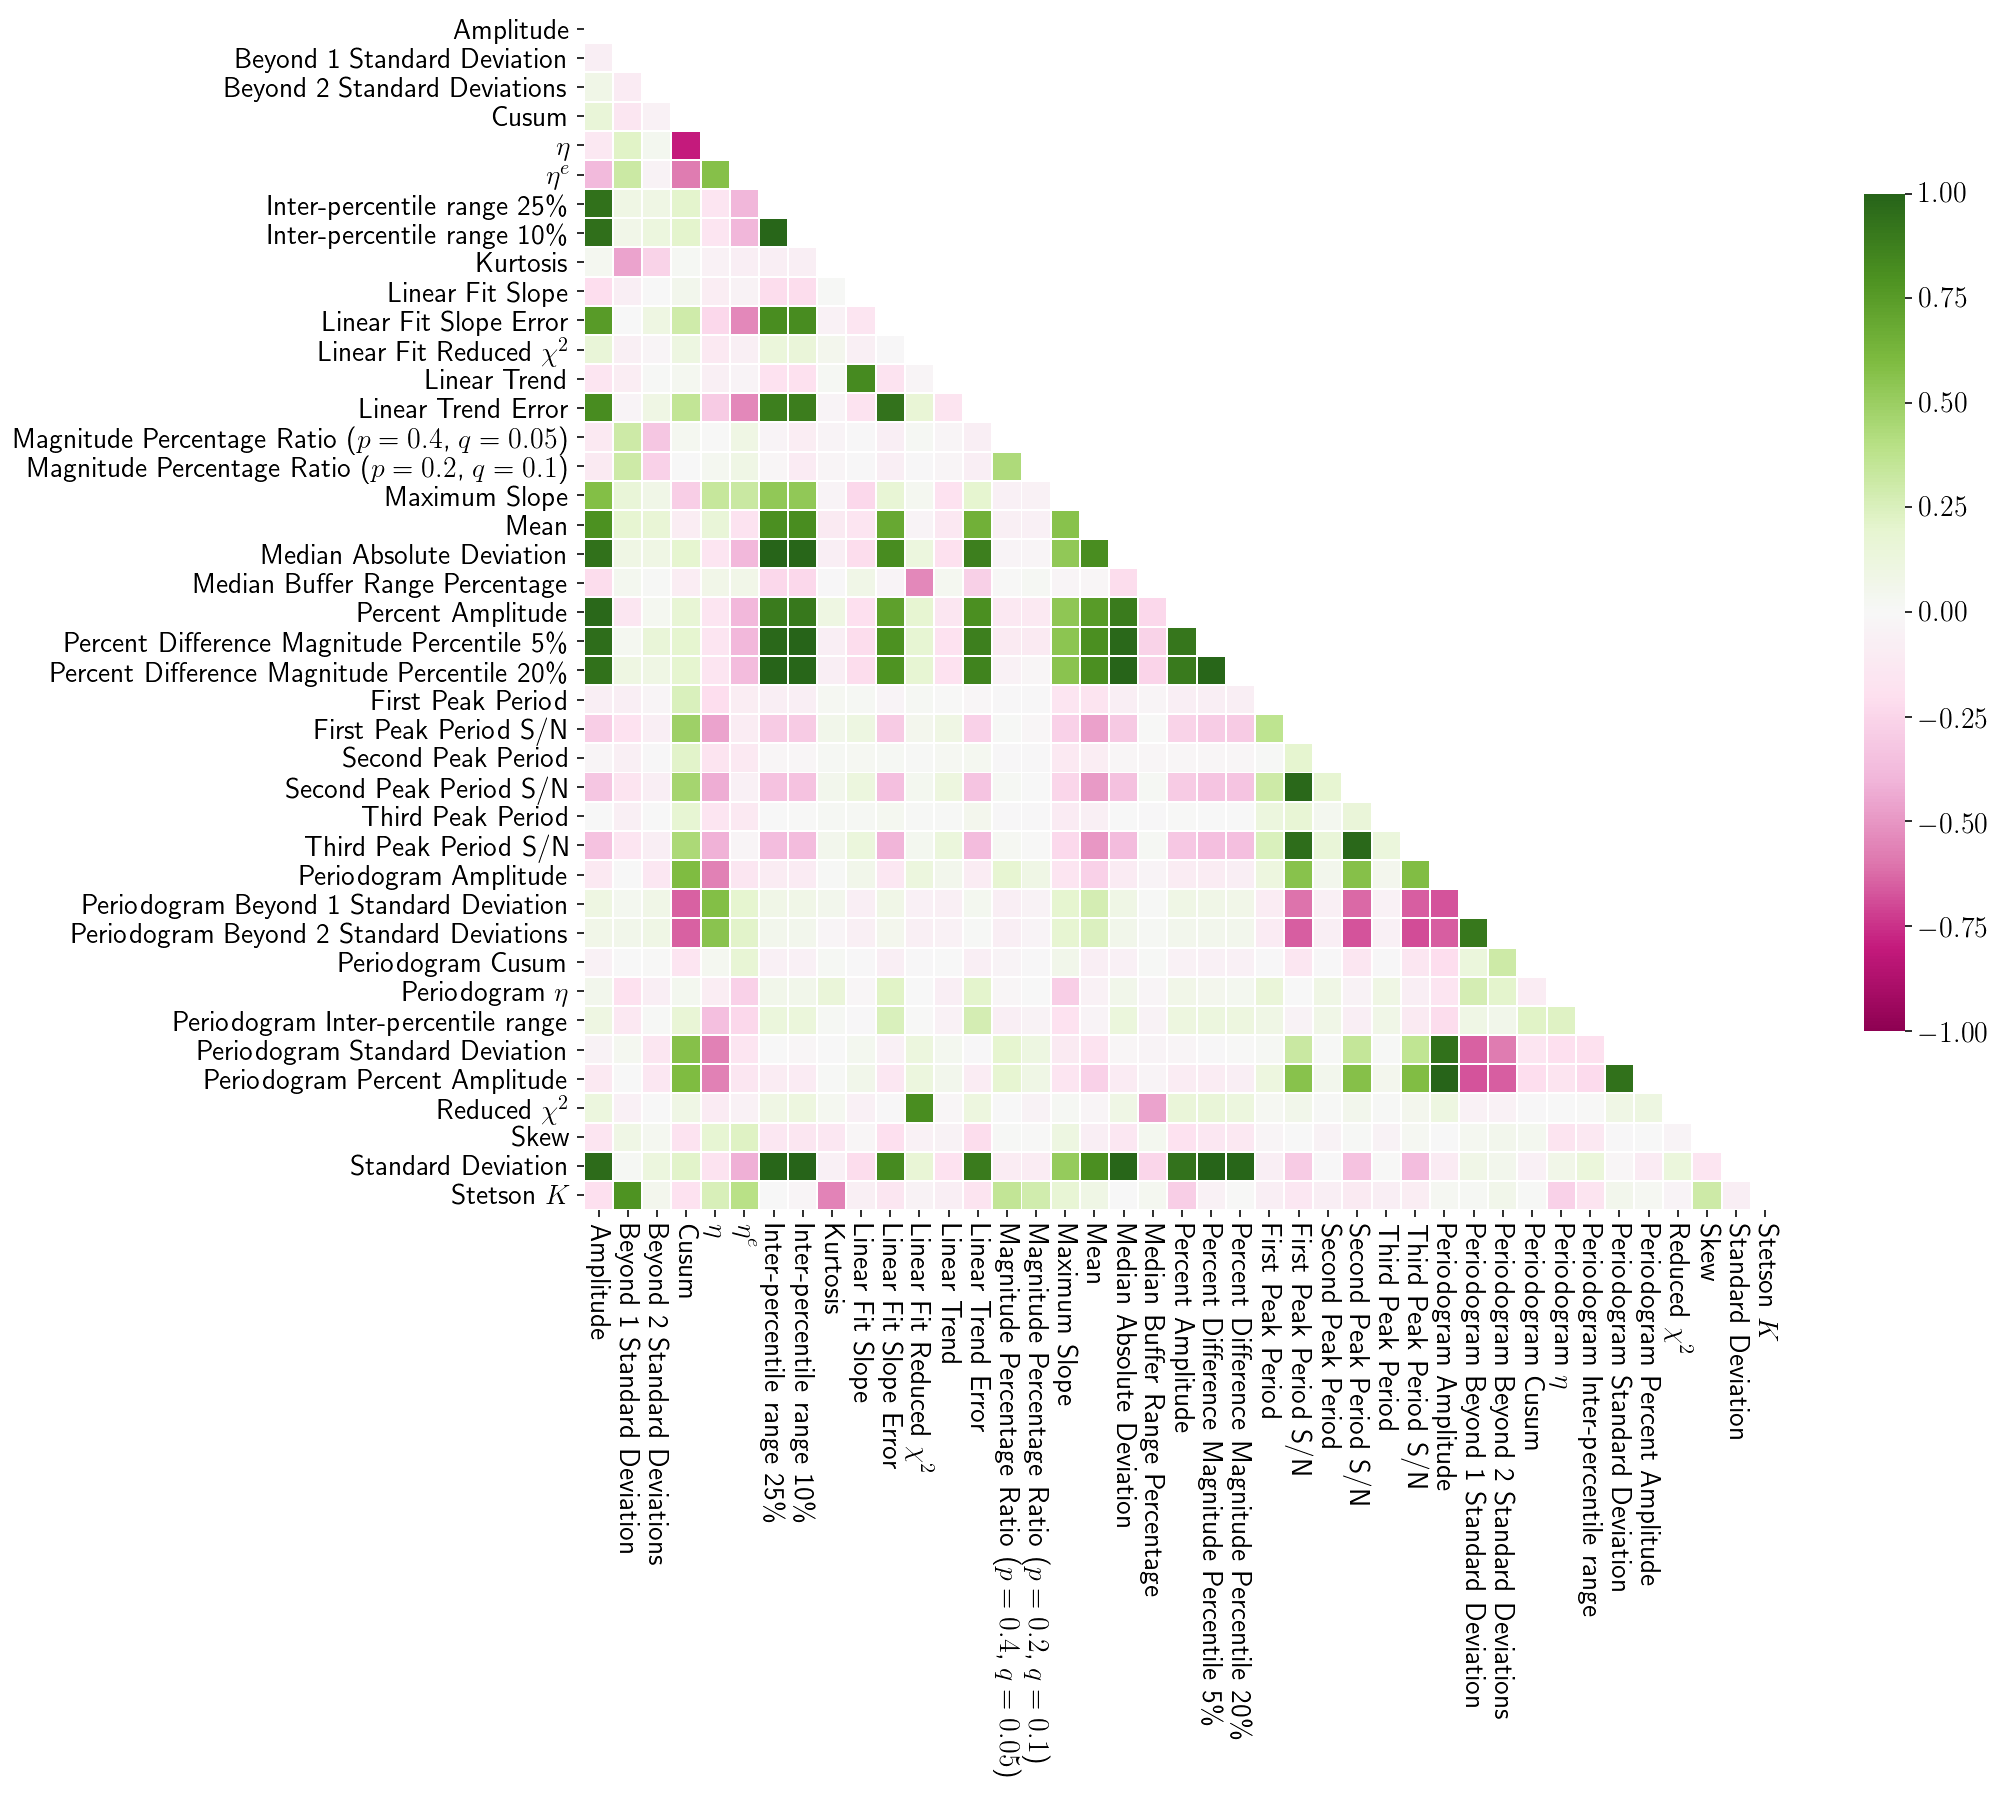

In [4]:
d = pd.DataFrame(data=X_norm, columns=list(feature_col))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='PiYG', annot=False, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

ax.set_xticklabels(list(feature_col), rotation=-90);

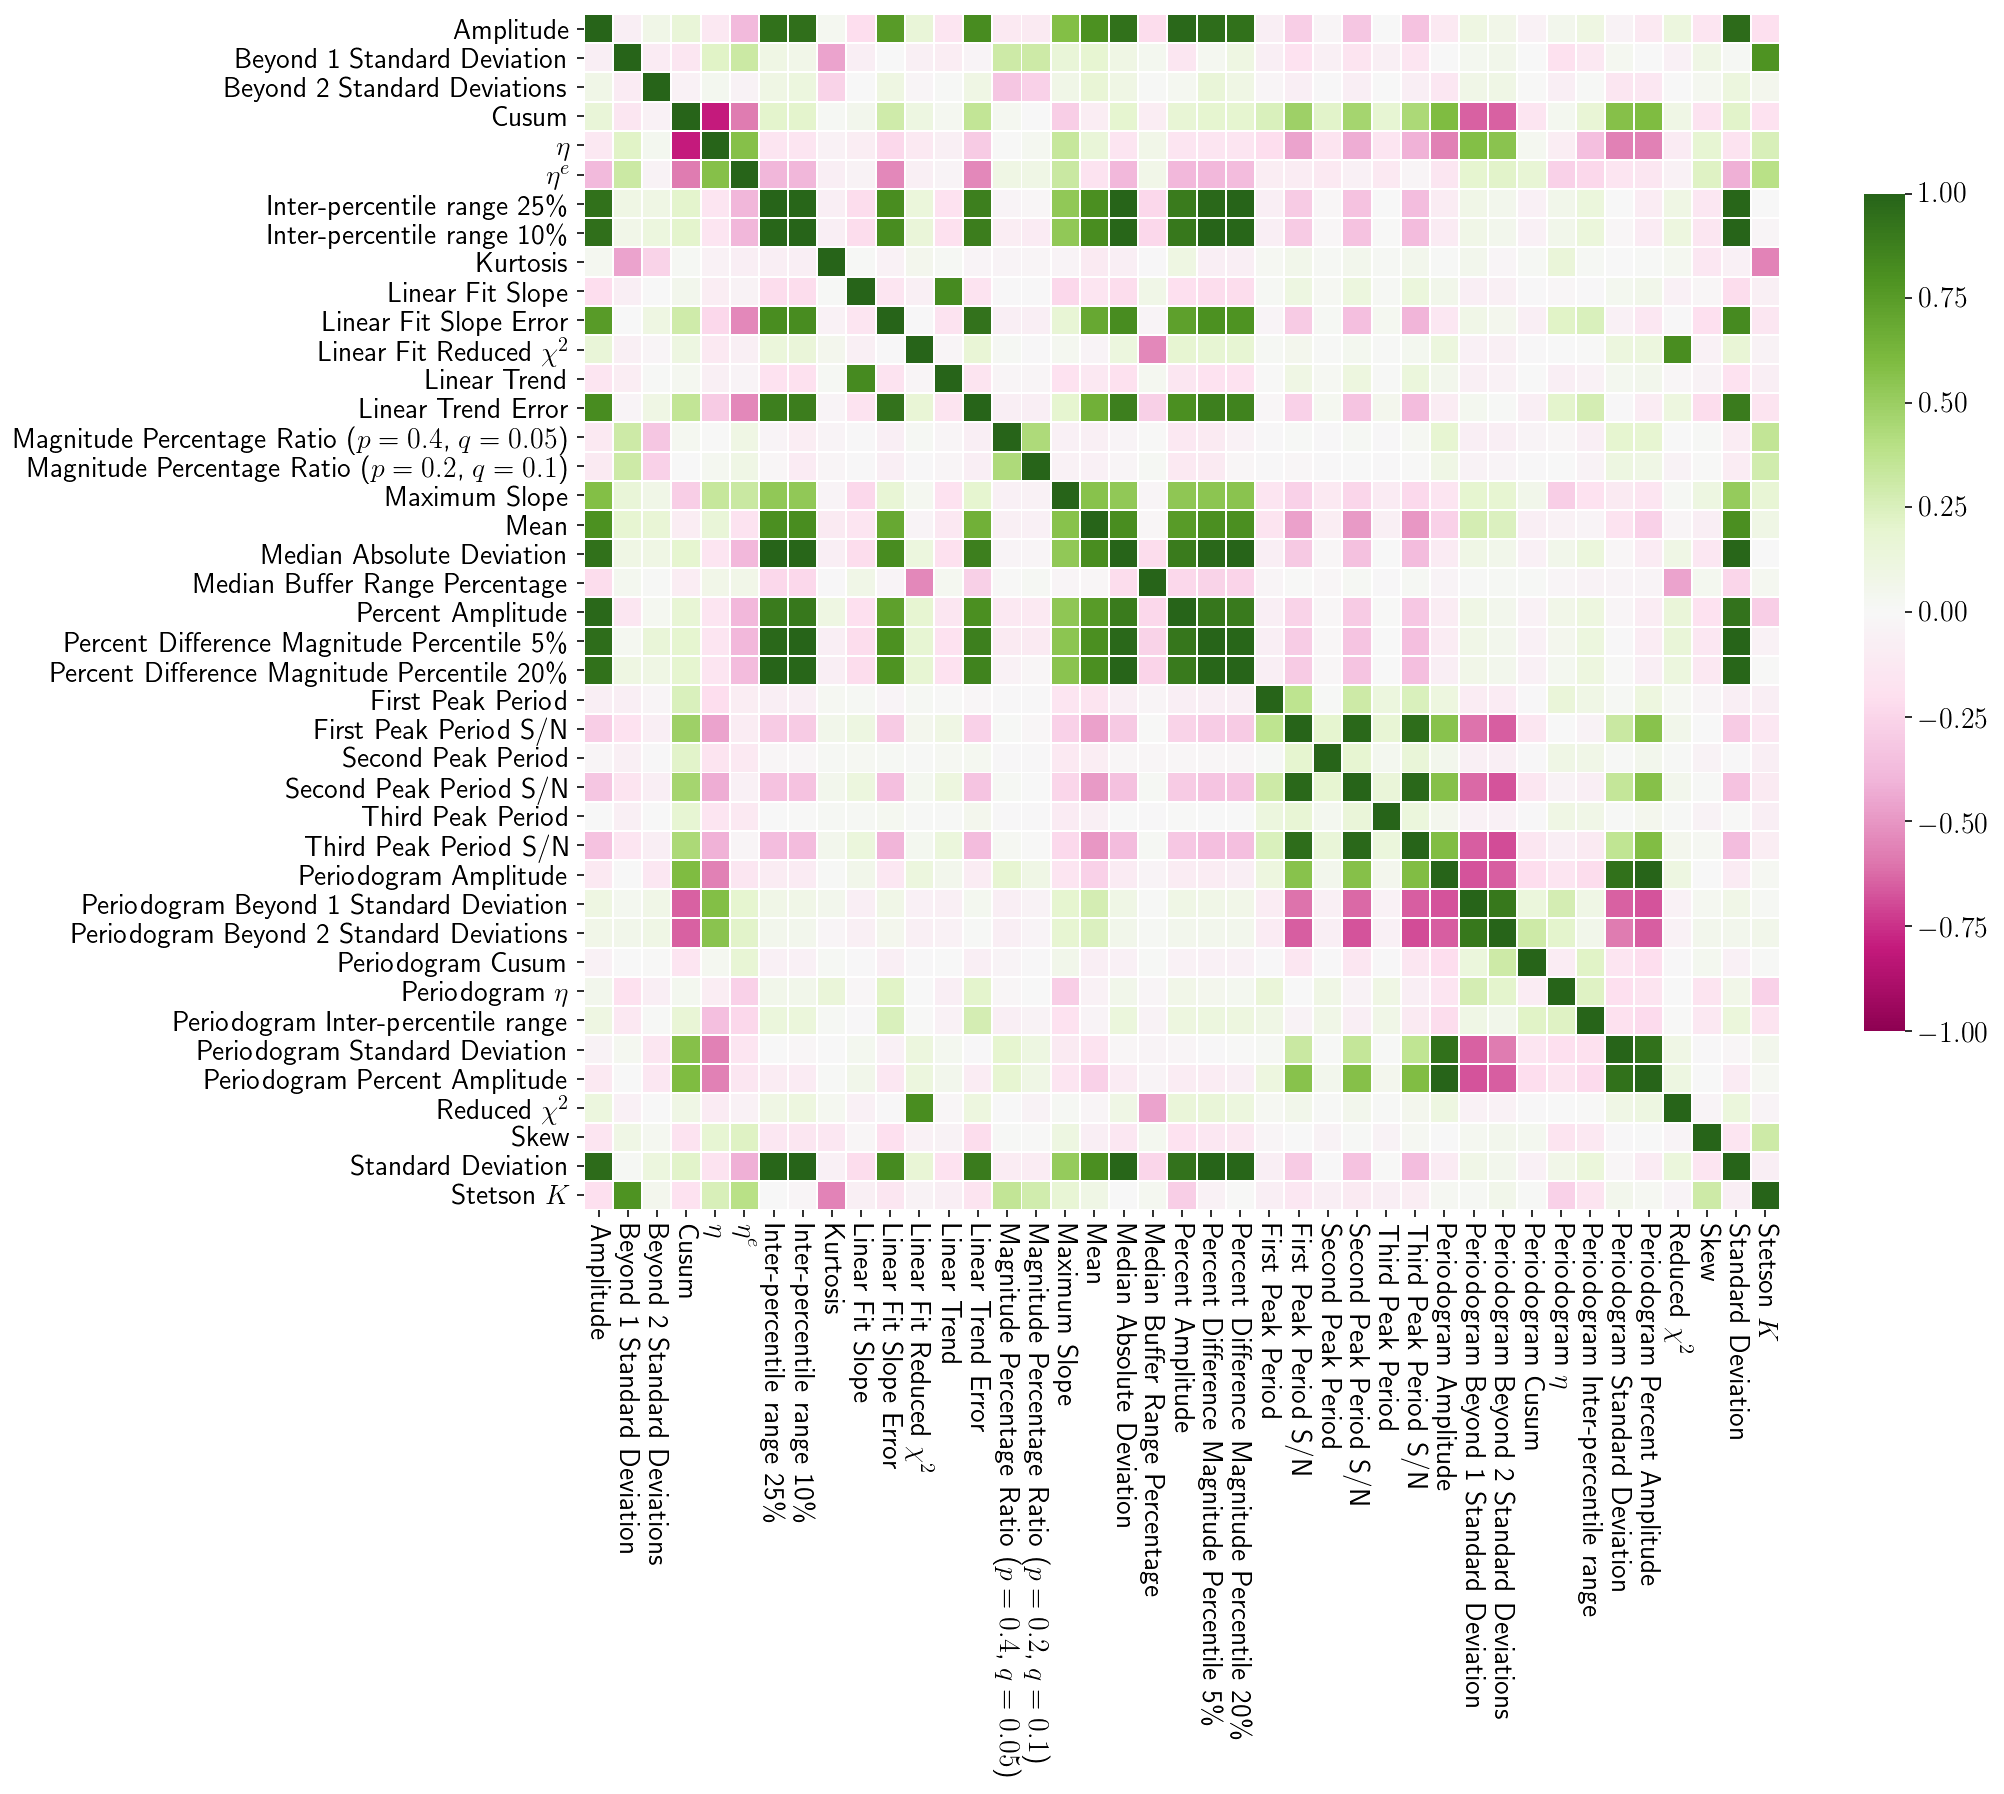

In [5]:
d = pd.DataFrame(data=X_norm, columns=list(feature_col))

# Compute the correlation matrix
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='PiYG', annot=False, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

ax.set_xticklabels(list(feature_col), rotation=-90);

plt.savefig('../figs/misc/correlation_matrix_all_fields.png', format='png', dpi=300, bbox_inches='tight')